# DATA CLEANING AND ANALYSIS
* The task is to sanitize and analyze the data to profile the sellers present and develop selection criteria to identify the best or most promising sellers in this dataset.
* Dataset used - Given (Garden category data from Amazon).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("/kaggle/input/razor-group-dataset/Sample_Longlist_Data.xlsx")
data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [3]:
# TAKING USEFUL COLUMNS ONLY
useful_columns = ["sellerproductcount", "sellerratings", "sellerdetails", "seller business name","businessaddress", "Count of seller brands", "Max % of negative seller ratings - last 30 days", "Max % of negative seller ratings - last 90 days","Hero Product 1 #ratings", "Max % of negative seller ratings - last 12 months","Hero Product 2 #ratings" ]

# COLUMNS SUITABLE FOR ANALYTICS
analytics_columns = ["seller business name", "Sample Brand URL", "Count of seller brands", "Max % of negative seller ratings - last 30 days", "Max % of negative seller ratings - last 90 days", "Max % of negative seller ratings - last 12 months", "Hero Product 1 #ratings", "Hero Product 2 #ratings"]

# USEFUL DATAFRAME
useful_data = data[useful_columns]
useful_data.head()

,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Hero Product 1 #ratings,Max % of negative seller ratings - last 12 months,Hero Product 2 #ratings
0,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,5873,12,4957
1,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,0,9,0
2,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,164,12,162
3,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0
4,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,224,15,113


In [4]:
useful_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   sellerproductcount                                 1513 non-null   object
 1   sellerratings                                      1411 non-null   object
 2   sellerdetails                                      1812 non-null   object
 3   seller business name                               1783 non-null   object
 4   businessaddress                                    1764 non-null   object
 5   Count of seller brands                             1839 non-null   int64 
 6   Max % of negative seller ratings - last 30 days    1839 non-null   int64 
 7   Max % of negative seller ratings - last 90 days    1839 non-null   int64 
 8   Hero Product 1 #ratings                            1839 non-null   int64 
 9   Max % of negative s

# PARSING DATA - DATA CLEANING AND EXTRACTION

## 1. Parsing `sellerproductcount` using `str.split` and `str.replace`

In [5]:
useful_data["sellerproductcount"].isna().sum() # INITIAL MISSING VALUES

326

In [6]:
# SPLITTING ON `RESULT`
productcount_parse1 = useful_data["sellerproductcount"].str.split(pat = "result", expand = True)
productcount_parse1.head()

,0,1
0,"1-16 of over 100,000",s
1,NaN,NaN
2,"1-16 of over 2,000",s
3,1-16 of 123,s
4,"1-16 of over 1,000",s


In [7]:
# REMOVING THE NON USEFUL DATA
productcount_parse2 = productcount_parse1[0].str.replace('[,overf ]', '', regex=True)
productcount_parse2 = pd.DataFrame(productcount_parse2)
productcount_parse2.head()

,0
0,1-16100000
1,NaN
2,1-162000
3,1-16123
4,1-161000


In [8]:
# CONDITION REPLACEMENT 
def conditional_replace(row):
    if pd.notna(row[0]) and '1-16' in row[0]:
        return row[0].replace('1-16', '')
    else:
        return row[0]

productcount_parse2[0] = productcount_parse2.apply(conditional_replace, axis = 1)
productcount_parse2.head()

,0
0,100000
1,NaN
2,2000
3,123
4,1000


In [9]:
# MAKING A DATAFRAME TO STORE THE PARSED DATA
parsed_data = pd.DataFrame()
parsed_data["Product Count"] = productcount_parse2.astype(float)
parsed_data

,Product Count
0,100000.0
1,NaN
2,2000.0
3,123.0
4,1000.0
...,...
1834,2000.0
1835,5000.0
1836,10000.0
1837,473.0


## 2. Parsing `sellerratings` using `str.split` and `str.replace`

In [10]:
# INITIAL MISSING VALUES IN THE MAIN COLUMN
useful_data["sellerratings"].isna().sum()

428

In [11]:
# SPLITTING ON THE BASIS OF % AND EXTRACTING THE PERCENTAGE
rating_parse1 = useful_data["sellerratings"].str.split(pat = "%", expand = True)
rating_parse1.head()

,0,1
0,88,positive in the last 12 months (118 ratings)
1,90,positive in the last 12 months (566 ratings)
2,85,positive in the last 12 months (75 ratings)
3,NaN,NaN
4,81,positive in the last 12 months (52 ratings)


In [12]:
rating_parse1[0].isna().sum() # SAME NUMBER HENCE NO DATA LOSS
# rating_parse1[0] contains - percentage

428

In [13]:
# NOW SPLITTING ON BRACKET TO EXTRACT RATING
rating_parse2 = rating_parse1[1].str.split(pat = "(", expand = True)
rating_parse2.head()

,0,1
0,positive in the last 12 months,118 ratings)
1,positive in the last 12 months,566 ratings)
2,positive in the last 12 months,75 ratings)
3,NaN,NaN
4,positive in the last 12 months,52 ratings)


In [14]:
# SPLITTING ON SPACE TO EXTRACT THE EXACT NO
rating_parse3 = rating_parse2[1].str.split(pat = " ", expand = True)
rating_parse3.head()

,0,1,2
0,118,ratings),None
1,566,ratings),None
2,75,ratings),None
3,NaN,NaN,NaN
4,52,ratings),None


In [15]:
rating_parse3[0].isna().sum() # SAME NO HENCE NO DATA LOSS
# PARSE3[0] CONTAINS RATING

428

In [16]:
parsed_data["Rating Pecentage"] = rating_parse1[0].astype(float)
parsed_data["Ratings Count"] = rating_parse3[0].astype(float)
parsed_data

,Product Count,Rating Pecentage,Ratings Count
0,100000.0,88.0,118.0
1,NaN,90.0,566.0
2,2000.0,85.0,75.0
3,123.0,NaN,NaN
4,1000.0,81.0,52.0
...,...,...,...
1834,2000.0,83.0,46.0
1835,5000.0,NaN,NaN
1836,10000.0,0.0,1.0
1837,473.0,67.0,3.0


## 3. Parsing `sellerdetails`

In [17]:
# EXTRACTING EMAILS
import re

mails = []
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
for detail in tqdm(useful_data["sellerdetails"]):
    if pd.notna(detail):
        mail = re.findall(email_pattern, detail)
        if len(mail) != 0:
            mails.append(mail[0])
        else:
            mails.append(None)
    else:
        mails.append(None)

100%|██████████| 1839/1839 [00:00<00:00, 71773.23it/s]


In [18]:
parsed_data["E Mail"] = mails
parsed_data

,Product Count,Rating Pecentage,Ratings Count,E Mail
0,100000.0,88.0,118.0,jadgemaello@gmail.com
1,NaN,90.0,566.0,info@1a-handelsagentur.de
2,2000.0,85.0,75.0,None
3,123.0,NaN,NaN,None
4,1000.0,81.0,52.0,None
...,...,...,...,...
1834,2000.0,83.0,46.0,None
1835,5000.0,NaN,NaN,None
1836,10000.0,0.0,1.0,None
1837,473.0,67.0,3.0,None


In [19]:
# EXTRACTING PHONE NUMBERS

numbers = []
phone_number_pattern = r'\+?(\d{1,3}[-.\s]?)?(\()?(\d{3})(?(2)\))[-.\s]?(\d{3})[-.\s]?(\d{4})'
for detail in tqdm(useful_data["sellerdetails"]):
    if (pd.notna(detail)):
        nums = re.findall(phone_number_pattern, detail)
        if (len(nums) != 0):
            num = nums[0]
            formatted_number = "1" if not num[0] else num[0]  # Add country code if missing
            formatted_number += f" ({num[2]}) {num[3]}-{num[4]}"
            numbers.append(formatted_number)
        else:
            numbers.append(None)
    else:
        numbers.append(None)

100%|██████████| 1839/1839 [00:00<00:00, 10283.53it/s]


In [20]:
parsed_data["Contact Number"] = numbers
parsed_data

,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number
0,100000.0,88.0,118.0,jadgemaello@gmail.com,1 (208) 964-6807
1,NaN,90.0,566.0,info@1a-handelsagentur.de,1 (039) 932-8297
2,2000.0,85.0,75.0,None,None
3,123.0,NaN,NaN,None,None
4,1000.0,81.0,52.0,None,None
...,...,...,...,...,...
1834,2000.0,83.0,46.0,None,None
1835,5000.0,NaN,NaN,None,None
1836,10000.0,0.0,1.0,None,None
1837,473.0,67.0,3.0,None,None


In [21]:
print("Extrtacted ",len(data) - parsed_data["E Mail"].isna().sum(), " E Mails.")
print("Extracted ",len(data) - parsed_data["Contact Number"].isna().sum(), " Phone Numbers.")

Extrtacted  312  E Mails.
Extracted  178  Phone Numbers.


In [22]:
parsed_data[parsed_data["E Mail"].notnull() & parsed_data["Contact Number"].notnull()]

,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number
0,100000.0,88.0,118.0,jadgemaello@gmail.com,1 (208) 964-6807
1,NaN,90.0,566.0,info@1a-handelsagentur.de,1 (039) 932-8297
14,919.0,97.0,116.0,webmaster@9pm-store.de,01 (514) 000-8562
19,NaN,76.0,3721.0,abc-markt@web.de,1 (057) 059-1155
30,1000.0,99.0,1739.0,info@deinegartenwelt.de,02 (234) 250-9631
...,...,...,...,...,...
1770,347.0,96.0,24.0,info@zoobamboo.de,04 (836) 996-7937
1776,442.0,96.0,106.0,info@zoomeister.de,1 (034) 296-7410
1779,211.0,94.0,34.0,info@zooshop-online.com,0 (358) 432-2859
1780,1000.0,97.0,631.0,amazon@zoostore.de,2 (985) 368-9961


## 4. Parsing `businessaddress` - Country

In [23]:
useful_data["businessaddress"].isna().sum()

75

In [24]:
useful_data["businessaddress"].fillna("NONE", inplace = True) # FILLING THE NAN VALUES

In [25]:
# EXTRACTING COUNTRIES FROM THE COLUMN
country = []
for address in useful_data["businessaddress"]:
    if address != "NONE":
        country.append(address[-2:])
    else:
        country.append(None)
parsed_data["Country"] = country
parsed_data

,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number,Country
0,100000.0,88.0,118.0,jadgemaello@gmail.com,1 (208) 964-6807,US
1,NaN,90.0,566.0,info@1a-handelsagentur.de,1 (039) 932-8297,DE
2,2000.0,85.0,75.0,None,None,CN
3,123.0,NaN,NaN,None,None,CN
4,1000.0,81.0,52.0,None,None,CN
...,...,...,...,...,...,...
1834,2000.0,83.0,46.0,None,None,CN
1835,5000.0,NaN,NaN,None,None,CN
1836,10000.0,0.0,1.0,None,None,CN
1837,473.0,67.0,3.0,None,None,CN


In [26]:
parsed_data["Country"].isna().sum() # NUMBERS REMAINS SAME HENCE NO DATA LOSS

75

# DATA ANALYTICS

In [27]:
analytics_data = data[analytics_columns]
analytics_data

,seller business name,Sample Brand URL,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings
0,Business Name:Lohas Living Inc,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,16,17,11,12,5873,4957
1,Business Name:1a-Handelsagentur,https://www.amazon.de/-/en/stores/tesa/page/12...,0,2,2,9,0,0
2,Business Name:nantongaohuanfangzhipinyouxiango...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,0,25,12,164,162
3,Business Name:Zhengzhou Yaoqiong Trading Company,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1,0,0,0,0,0
4,Business Name:shenzhenfeichangshangmeimaoyiyou...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,16,0,31,15,224,113
...,...,...,...,...,...,...,...,...
1834,"Business Name:Shenzhen Xinyile Trading Co., Ltd",https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,5,0,9,15,95,76
1835,Business Name:wujixianzhanpingzongheshangdian,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,0,0,0,0,1,0
1836,Business Name:henanliyanshangmaoyouxiangongsi,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,10,0,0,0,1,1
1837,Business Name:shanximinsanyizhuangshijiancaiyo...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,4,0,0,33,9,1


In [28]:
# FINAL DATA
analytics_data = pd.concat([analytics_data, parsed_data], axis = 1)
analytics_data

,seller business name,Sample Brand URL,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number,Country
0,Business Name:Lohas Living Inc,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,16,17,11,12,5873,4957,100000.0,88.0,118.0,jadgemaello@gmail.com,1 (208) 964-6807,US
1,Business Name:1a-Handelsagentur,https://www.amazon.de/-/en/stores/tesa/page/12...,0,2,2,9,0,0,NaN,90.0,566.0,info@1a-handelsagentur.de,1 (039) 932-8297,DE
2,Business Name:nantongaohuanfangzhipinyouxiango...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,0,25,12,164,162,2000.0,85.0,75.0,None,None,CN
3,Business Name:Zhengzhou Yaoqiong Trading Company,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,1,0,0,0,0,0,123.0,NaN,NaN,None,None,CN
4,Business Name:shenzhenfeichangshangmeimaoyiyou...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,16,0,31,15,224,113,1000.0,81.0,52.0,None,None,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,"Business Name:Shenzhen Xinyile Trading Co., Ltd",https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,5,0,9,15,95,76,2000.0,83.0,46.0,None,None,CN
1835,Business Name:wujixianzhanpingzongheshangdian,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,0,0,0,0,1,0,5000.0,NaN,NaN,None,None,CN
1836,Business Name:henanliyanshangmaoyouxiangongsi,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,10,0,0,0,1,1,10000.0,0.0,1.0,None,None,CN
1837,Business Name:shanximinsanyizhuangshijiancaiyo...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,4,0,0,33,9,1,473.0,67.0,3.0,None,None,CN


## Filtering out Chinese Sellers

In [29]:
analytics_data = analytics_data[analytics_data["Country"] != "CN"]
analytics_data

,seller business name,Sample Brand URL,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number,Country
0,Business Name:Lohas Living Inc,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,16,17,11,12,5873,4957,100000.0,88.0,118.0,jadgemaello@gmail.com,1 (208) 964-6807,US
1,Business Name:1a-Handelsagentur,https://www.amazon.de/-/en/stores/tesa/page/12...,0,2,2,9,0,0,NaN,90.0,566.0,info@1a-handelsagentur.de,1 (039) 932-8297,DE
5,NaN,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,13,0,0,0,3284,2944,28.0,NaN,NaN,None,None,None
14,Business Name:Oliver Mills,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,15,0,0,3,1446,921,919.0,97.0,116.0,webmaster@9pm-store.de,01 (514) 000-8562,DE
19,Business Name:ABC-Schnäppchenmarkt GmbH,https://www.amazon.de/-/en/stores/TFA+Dostmann...,0,18,20,20,0,0,NaN,76.0,3721.0,abc-markt@web.de,1 (057) 059-1155,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,Business Name:AD-ACCESS-Zündholz Riesa GmbH,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,8,0,0,0,65,41,52.0,100.0,16.0,None,None,DE
1813,VAT Number:DE815289413,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,0,0,0,91,18,177.0,100.0,10.0,info@zurrosakuh.de,None,None
1814,Business Name:Reinhard Joormann -FansandTrends...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,6,8,7,636,466,1000.0,91.0,3075.0,r.joormann@googlemail.com,02 (362) 605-7826,DE
1815,Business Name:Zwoofer.com,https://www.amazon.de/-/en/Versele-Laga/b/ref=...,16,0,0,0,27269,11333,2000.0,100.0,4.0,None,None,NL


### CORELATION MATRIX
* To check for corelation among columns

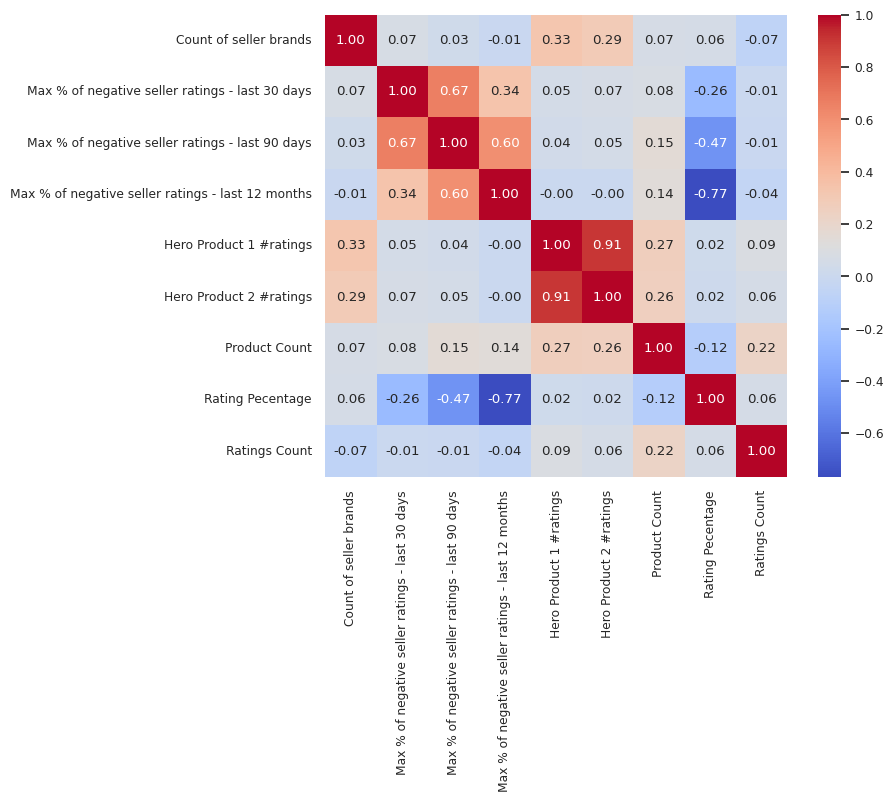

In [30]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
cmap = sns.color_palette("coolwarm", as_cmap=True)

sns.heatmap(data = analytics_data.drop(["seller business name", "Sample Brand URL", "Country",
                                        "E Mail", "Contact Number"], axis = 1).corr(), 
            annot=True, fmt=".2f", cmap=cmap, cbar=True, square=True)
plt.show()

### KDE PLOTS
* To check out for the `Probability Density functions` for checking the `distribution` of data

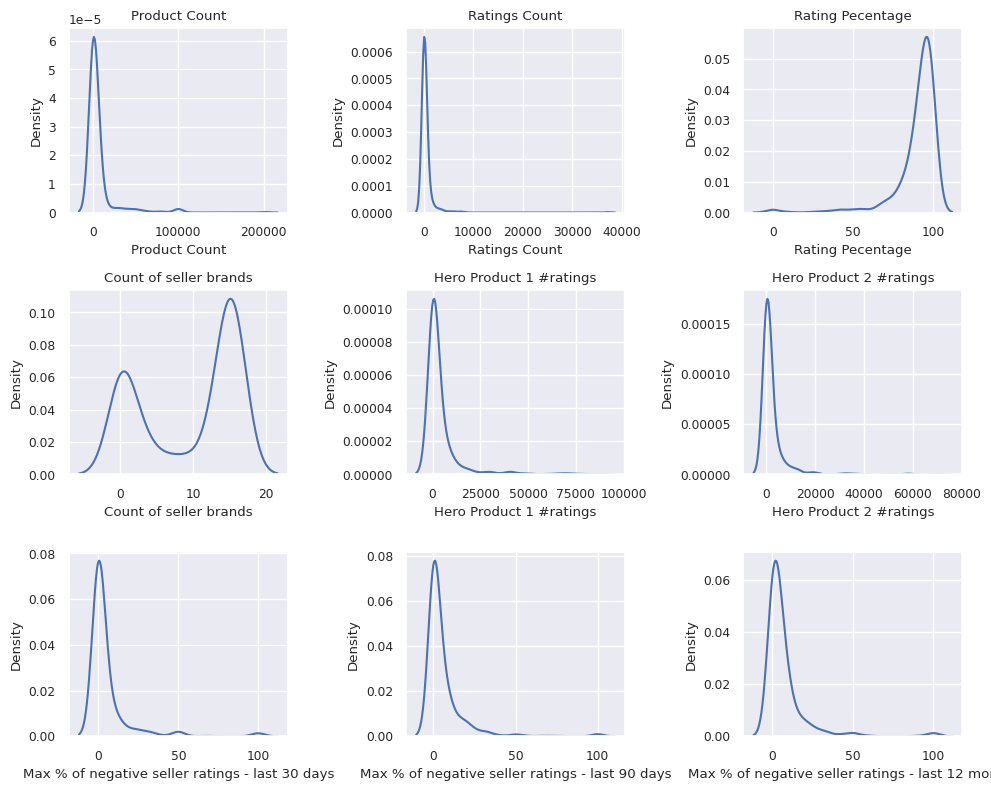

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))

sequence = ["Product Count", "Ratings Count", "Rating Pecentage", "Count of seller brands", "Hero Product 1 #ratings",
           "Hero Product 2 #ratings", "Max % of negative seller ratings - last 30 days", 
           "Max % of negative seller ratings - last 90 days", "Max % of negative seller ratings - last 12 months"]

for i in range(3):
    for j in range(3):
        sns.kdeplot(analytics_data[sequence[3*i+j]], ax = axes[i, j])
        if 3*i+j < 6 :
            axes[i][j].set_title(sequence[3*i+j])

plt.tight_layout()
plt.show()

## NOW FILTERING THE DATA TO GET THE BEST SELLERS
* Please note that the filtering conditions are variable and depends on the buisness requirements and may be changed as and when required.

### 1. Taking Product Count > 500

In [32]:
analytics_data = analytics_data[analytics_data["Product Count"] > 500]
analytics_data

,seller business name,Sample Brand URL,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number,Country
0,Business Name:Lohas Living Inc,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,16,17,11,12,5873,4957,100000.0,88.0,118.0,jadgemaello@gmail.com,1 (208) 964-6807,US
14,Business Name:Oliver Mills,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,15,0,0,3,1446,921,919.0,97.0,116.0,webmaster@9pm-store.de,01 (514) 000-8562,DE
22,Business Name:MADEWELL SUPPLY INC,https://www.amazon.de/-/en/stores/Seville+Clas...,16,0,0,0,10538,8293,40000.0,100.0,10.0,None,None,US
23,Business Name:Blumenbecker Industriebedarf GmbH,https://www.amazon.de/-/en/stores/tesa/page/12...,15,15,12,10,30139,11182,100000.0,88.0,3134.0,bib.beckum@blumenbecker.com,None,DE
24,Business Name:Jörg Müller & Petra Scheerer GbR,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,3,1,2,3286,3079,3000.0,97.0,610.0,None,None,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,Business Name:Matthias Löchelt Versandhandel,https://www.amazon.de/-/en/Skyline/b/ref=bl_dp...,14,2,2,2,601,321,1000.0,97.0,631.0,amazon@zoostore.de,2 (985) 368-9961,DE
1784,Business Name:Zoreno Versandhandel GmbH,(blank),16,3,2,2,25802,4979,100000.0,98.0,2630.0,ade.support@zoreno.com,None,CH
1798,NaN,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,2,0,0,0,2,0,40000.0,67.0,3.0,None,None,None
1814,Business Name:Reinhard Joormann -FansandTrends...,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,6,8,7,636,466,1000.0,91.0,3075.0,r.joormann@googlemail.com,02 (362) 605-7826,DE


### 2. Taking High Rating products
* Taking `rating > 80` to ensure high rating, and `count > 100` so as to ensure considerable randomness and participation of random people in the rating.

In [33]:
# QUANTILES TO SEE DISTRIBUTION OF COLUMN
Q1 = analytics_data["Ratings Count"].quantile(0.25)
Q2 = analytics_data["Ratings Count"].quantile(0.50)
Q3 = analytics_data["Ratings Count"].quantile(0.75)
Q1, Q2, Q3

(27.0, 107.0, 350.0)

In [34]:
# SETTING THE FILTERING CONDITION
analytics_data = analytics_data[(analytics_data["Rating Pecentage"] > 80) & (analytics_data["Ratings Count"] > 100)]
analytics_data

,seller business name,Sample Brand URL,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number,Country
0,Business Name:Lohas Living Inc,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,16,17,11,12,5873,4957,100000.0,88.0,118.0,jadgemaello@gmail.com,1 (208) 964-6807,US
14,Business Name:Oliver Mills,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,15,0,0,3,1446,921,919.0,97.0,116.0,webmaster@9pm-store.de,01 (514) 000-8562,DE
23,Business Name:Blumenbecker Industriebedarf GmbH,https://www.amazon.de/-/en/stores/tesa/page/12...,15,15,12,10,30139,11182,100000.0,88.0,3134.0,bib.beckum@blumenbecker.com,None,DE
24,Business Name:Jörg Müller & Petra Scheerer GbR,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,3,1,2,3286,3079,3000.0,97.0,610.0,None,None,DE
25,Business Name:boni-shop.com OHG,https://www.amazon.de/-/en/Nexa-Lotte/b/ref=bl...,15,1,1,1,2128,1759,2000.0,98.0,1488.0,amazon@boni-shop.com,None,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,VAT Number:DE297910268,https://www.amazon.de/-/en/stores/Tetra/page/D...,16,0,7,3,3682,2814,710.0,97.0,140.0,info@zoo-bue-pet.de,None,None
1773,Business Name:Moritz-Consumer-Service,https://www.amazon.de/-/en/stores/Tetra/page/D...,15,0,0,3,8936,8740,4000.0,96.0,173.0,info@zooheld.de,None,DE
1780,Business Name:Matthias Löchelt Versandhandel,https://www.amazon.de/-/en/Skyline/b/ref=bl_dp...,14,2,2,2,601,321,1000.0,97.0,631.0,amazon@zoostore.de,2 (985) 368-9961,DE
1784,Business Name:Zoreno Versandhandel GmbH,(blank),16,3,2,2,25802,4979,100000.0,98.0,2630.0,ade.support@zoreno.com,None,CH


### 3. Setting a threshold for negative reviews i.e. less than 10%.

In [35]:
analytics_data[(analytics_data["Max % of negative seller ratings - last 90 days"] < 10) & 
               (analytics_data["Max % of negative seller ratings - last 90 days"] < 10) &
               (analytics_data["Max % of negative seller ratings - last 12 months"] < 10)]

,seller business name,Sample Brand URL,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number,Country
14,Business Name:Oliver Mills,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,15,0,0,3,1446,921,919.0,97.0,116.0,webmaster@9pm-store.de,01 (514) 000-8562,DE
24,Business Name:Jörg Müller & Petra Scheerer GbR,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,3,1,2,3286,3079,3000.0,97.0,610.0,None,None,DE
25,Business Name:boni-shop.com OHG,https://www.amazon.de/-/en/Nexa-Lotte/b/ref=bl...,15,1,1,1,2128,1759,2000.0,98.0,1488.0,amazon@boni-shop.com,None,DE
30,Business Name:Daniel Vogeley und Christopher G...,https://www.amazon.de/-/en/stores/DeineGartenw...,6,0,1,1,764,599,1000.0,99.0,1739.0,info@deinegartenwelt.de,02 (234) 250-9631,DE
36,Business Name:itenga GmbH,https://www.amazon.de/-/en/stores/Vileda+GmbH+...,15,7,8,8,40683,18910,50000.0,91.0,5150.0,info@itenga.de,None,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,VAT Number:DE297910268,https://www.amazon.de/-/en/stores/Tetra/page/D...,16,0,7,3,3682,2814,710.0,97.0,140.0,info@zoo-bue-pet.de,None,None
1773,Business Name:Moritz-Consumer-Service,https://www.amazon.de/-/en/stores/Tetra/page/D...,15,0,0,3,8936,8740,4000.0,96.0,173.0,info@zooheld.de,None,DE
1780,Business Name:Matthias Löchelt Versandhandel,https://www.amazon.de/-/en/Skyline/b/ref=bl_dp...,14,2,2,2,601,321,1000.0,97.0,631.0,amazon@zoostore.de,2 (985) 368-9961,DE
1784,Business Name:Zoreno Versandhandel GmbH,(blank),16,3,2,2,25802,4979,100000.0,98.0,2630.0,ade.support@zoreno.com,None,CH


## SORTING ON THE BASIS OF PRODUCT COUNT, HIGH RATING AND RATING COUNTS
* So as to bring top sellers on top by sorting in decreasing order.

In [36]:
sorted_data = analytics_data.sort_values(by=['Rating Pecentage', 'Product Count', "Ratings Count"], 
                                         ascending=[False, False,False])
sorted_data

,seller business name,Sample Brand URL,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Product Count,Rating Pecentage,Ratings Count,E Mail,Contact Number,Country
862,Business Name:Vinfiz GmbH,https://www.amazon.de/-/en/STRICKER/b/ref=bl_d...,15,0,0,0,2436,716,6000.0,100.0,669.0,info@vinfiz.de,None,DE
157,"Business Name:Horn, Eckard",https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,15,0,0,0,2036,1525,2000.0,100.0,576.0,kontakt@kochmesser-shop.com,None,DE
538,Business Name:Geschenke Direkt GmbH,https://www.amazon.de/-/en/Anzm/b/ref=bl_dp_s_...,16,3,1,1,10917,2527,9000.0,99.0,496.0,None,None,DE
219,Business Name:Nähstüb`l Heike Bromnitz,https://www.amazon.de/-/en/Prym/b/ref=bl_dp_s_...,16,0,4,1,2160,2156,4000.0,99.0,235.0,service@kurzwaren-profi.de,None,DE
1046,Business Name:Wohnkult,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,16,2,2,1,5329,3079,3000.0,99.0,2950.0,info@wohnkult.net,0 (872) 191-6360,DE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,VAT Number:DE316231090,https://www.amazon.de/-/en/stores/Weedness/pag...,11,25,20,12,2479,235,598.0,86.0,182.0,Timgrunert1@gmx.de,01 (578) 739-7921,None
122,Business Name:Argofield Limited,https://www.amazon.de/-/en/stores/VTech+Lernsp...,15,50,23,12,4639,2566,3000.0,84.0,147.0,None,None,GB
363,Business Name:mk Objektmöbel GmbH,https://www.amazon.de/-/en/stores/GAH-Alberts/...,16,25,20,15,1052,1028,3000.0,82.0,1438.0,service@livindo.de,None,DE
256,Business Name:LatestBuy,https://www.amazon.de/-/en/stores/Funko+Frozen...,16,0,0,16,10848,8857,8000.0,81.0,102.0,None,None,AU


In [37]:
# EXTRACTING THE DATA
sorted_data.to_csv("sorted_data.csv") #147 final data points

## These are the seller with considerable amount of product counts and good product rating.

## As stated above, the filtering conditions are variable and depends on the buisness requirements and may be changed as and when required.

## THANKYOU